In [33]:
# Pandas
import pandas as pd

# SQL Alchemy
from sqlalchemy import create_engine
import psycopg2
import matplotlib.pyplot as plt
import numpy as np
database_path = "Employees_db"
username = 'Enter username'
password = 'Enter password'
host = 'localhost'
port = 5432

In [2]:
# As the URL is like any other URL, special characters such as those that may be used in the password need
#to be URL encoded to be parsed correctly.. Below is an example of a URL that includes the password "kx%jj5/g",
#where the percent sign and slash characters are represented as %25 and %2F, respectively:

# >>> import urllib.parse
# >>> urllib.parse.quote_plus("kx%jj5/g")
# 'kx%25jj5%2Fg'

In [3]:
# Create Engine
# engine = create_engine(f"sqlite:///{database_path}")



engine = create_engine(f"postgresql://{username}:{password}@{host}:{port}/{database_path}") 
conn = engine.connect()

In [12]:
# Query All Records in the the Database
employees = pd.read_sql("SELECT * FROM employees", conn)
employees.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18


In [ ]:
from sqlalchemy.orm import Session
session = Session(bind=engine)


In [29]:
salaries = pd.read_sql("SELECT t.title, AVG(s.salary) AS salary_avg FROM employees AS e INNER JOIN salaries AS s ON e.emp_no = s.emp_no INNER JOIN Titles AS t ON t.title_id = e.emp_title_id GROUP BY t.title", conn)
salaries.head(10)

,title,salary_avg
0,Assistant Engineer,48564.434447
1,Engineer,48535.336511
2,Manager,51531.041667
3,Senior Engineer,48506.799871
4,Senior Staff,58550.172704
5,Staff,58465.382850
6,Technique Leader,48582.896092


Text(0, 0.5, 'Salary')

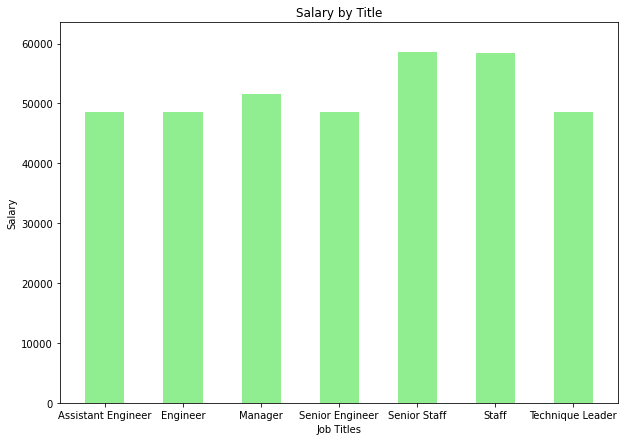

In [39]:
# Bar Plot of Salary by Title
# x = range(len(group_salaries.mean()))
x_axis = np.arange(len(salaries))
tick_locations = [value for value in x_axis]
fig = plt.figure(figsize=(10,7))
plt.bar(x_axis, salaries.salary_avg, width=0.5, color='lightgreen')
plt.ylim(0, max(salaries.salary_avg) + 5000)
plt.title('Salary by Title')
plt.xticks(tick_locations, salaries.title)
plt.xlabel('Job Titles')
plt.ylabel('Salary')